Evolution Strategies for Deep Learning
==============

In this interactive tutorial, we will be reviewing using random optimization techniques and evolutionary algorithms for learning systems, like Neural Networks.
The tutorial is active and will be updated over time with new experiments, results and improvements.

Motivation
=============
Currently, deep neural networks and other models, are trained using gradient descent algorithms.
For a lot of models and examples this works very, but also has a few downsides:

* High memory usage. Computing the gradient of a model scales linearly with the batch size, which means that for large models multiple GB's of expensive, high bandwidth GPU memory
* Because optimization depends on the gradient, the 
* Gradient-based optimization without noise will get stuck in local minima.




Toy Example
=============

In this example we will be optimizing the function `f(x) = x²`. The minimum of `f(x)` is at `x=0`. 
Here, we will be using the simplest case of using just one sample per iteration and just one mutation.
We also keep no history or pool of the best performing examples, but are going to apply an update at each step.

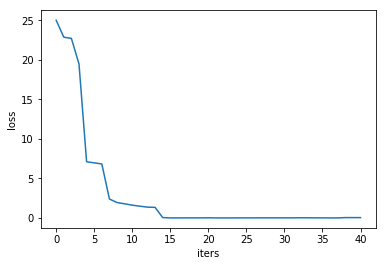

In [4]:
import numpy as np, matplotlib.pyplot as plt

# seed the random number generator, so we'll get the same result every time
np.random.seed(42)
# the learning rate, or step which is multiplied by our random sample
lr = 0.3
# the parameters of our model, which we want to optimize
# We choose an 
param_x = -5

# our "model"
def model(x):
    return x ** 2

# our loss function
# this is the evalutation score of the model
def loss(x):
    return abs(x)

def model_loss(x):
    return loss(model(x))

# the training algorithm
num_iters = 40
prev_loss = model_loss(param_x)
loss_history = [prev_loss]
param_history = [param_x]
for _ in range(num_iters):
    # we create a sample, here from a normal distribution
    # with zero mean and 
    sample = np.random.normal(scale=lr)
    # we measure sign and magnitude of improvement after applying the change
    improvement = prev_loss - model_loss(param_x + sample)

    # We are going to scale our sample by the rate of improvement
    # That means if our improvement is negative, we move in
    # the opposite direction of this improvement
    param_x = param_x + sample * improvement
    
    prev_loss = model_loss(param_x)
    
    loss_history.append(prev_loss)
    param_history.append(param_x)

plt.plot(loss_history)

plt.ylabel('loss')
plt.xlabel('iters')

plt.show()

We see that the loss quickly drops to about 0 down after about 15 iterations.
Increasing the learning rate makes optimization faster, but also more unstable.